# Table of Temperatures from GEFS members
This notebook using a GEFS members to look at the range of possible temperatures at a chosen station for a given time. It then creates a risk for temperatures in certain ranges

### Steps:
1. Import necessary libraries
2. Define constants and helper functions
3. Calculate Percentages
4. Create table

In [5]:
# ---------------------------- Imports ----------------------------
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from herbie import Herbie

In [6]:
# ---------------------------- Config -----------------------------

LAT_STN = 40.7128
LON_STN = -74.0060
RUN_TIME = "2024-04-07 00:00"
FORECAST_HOUR = 120
MEMBERS = ["p%.2d" %(i) for i in range(1, 31)] + ["c00"]  # GEFS ensemble members

# Temperature ranges and labels
TEMP_RANGES = [
    (-np.inf, -15), (-15, -5), (-5, 32), (32, 50),
    (50, 70), (70, 95), (95, 105), (105, np.inf)
]
RANGE_LABELS = [
    "Extreme Cold Warning (< -15°F)", "Cold Weather Advisory (-15°F to -5°F)",
    "Cold to Freezing (-5°F to 32°F)", "Freezing to Cool (32°F to 50°F)",
    "Cool to Warm (50°F to 70°F)", "Warm to Hot (70°F to 95°F)",
    "Heat Advisory (95°F to 105°F)", "Excessive Heat Warning (> 105°F)"
]

In [7]:
# ------------------------ Helper Functions -----------------------

def kelvin_to_fahrenheit(temps):
    """
    Convert temperatures from Kelvin to Fahrenheit.
    """
    return (temps - 273.15) * 9/5 + 32

# Helper function to get temperature for each member
def get_member_temperature(member):
    """
    Retrieve temperature for a given member from Herbie.
    """
    H = Herbie(RUN_TIME, model="gefs", product="atmos.5", member=member,
               fxx=FORECAST_HOUR, verbose=False)
    try:
        tmp_2m_ds = H.xarray("TMP:2 m")
        lon = LON_STN % 360 if tmp_2m_ds.longitude.max() > 180 else LON_STN
        temp_var = list(tmp_2m_ds.data_vars)[0]
        temp = tmp_2m_ds[temp_var].sel(latitude=LAT_STN, longitude=lon, method="nearest")
        return temp
    except Exception as e:
        print(f"{member} failed: {e}")
        return None

# Retrieve temperatures for all members (and valid time)
temps = []
valid_time = None  # Initialize valid_time
for member in MEMBERS:
    print('member: ', member)
    temp = get_member_temperature(member)
    if temp is not None:
        temps.append(temp.values.item())
        if valid_time is None:  # Get valid time from the first successful fetch
            valid_time = temp.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()

temps = np.array(temps)  # Convert to numpy array

# Convert to Fahrenheit
temps_f = kelvin_to_fahrenheit(temps)

member:  p01


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  p02


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  p03


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  p04


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  p05


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  p06


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  p07


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  p08


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  p09


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  p10


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  p11


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  p12


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  p13


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  p14


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  p15


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  p16


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  p17


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  p18


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  p19


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  p20


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  p21


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  p22


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  p23


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  p24


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  p25


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  p26


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  p27


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  p28


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  p29


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  p30


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


member:  c00


/opt/anaconda3/envs/GEFS_plot/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


### Calculate Percentages

In [8]:
# Calculate the percentage of members within each range
def calculate_percentages(temps_f):
    """
    Calculate the percentage of members in each temperature range.
    """
    percentages = {}
    for (lower, upper), label in zip(TEMP_RANGES, RANGE_LABELS):
        in_range = ((temps_f >= lower) & (temps_f < upper)).sum()
        percentage = 100 * in_range / temps_f.size
        percentages[label] = round(percentage)
    return percentages

percentages = calculate_percentages(temps_f)

# Create a DataFrame for graphical representation
df = pd.DataFrame(list(percentages.items()), columns=["Temperature Range", "Percentage of GEFS Members"])

### Plot the Table

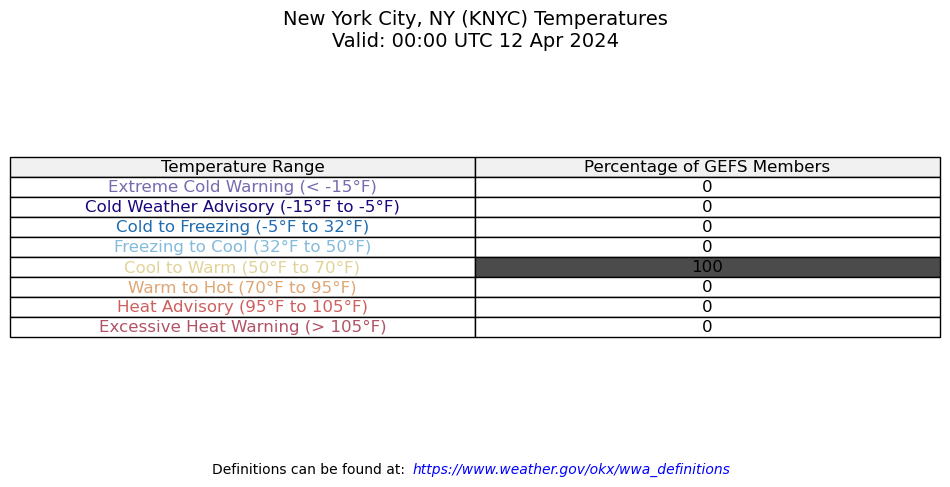

In [9]:
# Define colormap and normalization for background color
bg_cmap = plt.get_cmap("Greys")
norm_bg = mcolors.Normalize(vmin=0, vmax=130)

# Text color definitions for the table
text_colors = [
    (119/255, 107/255, 176/255), (26/255, 7/255, 124/255),
    (32/255, 109/255, 175/255), (132/255, 187/255, 219/255),
    (225/255, 211/255, 151/255), (223/255, 166/255, 117/255),
    (206/255, 97/255, 95/255), (177/255, 82/255, 103/255)
]

# Plot the table
def plot_table(df, valid_time):
    """
    Create a table plot for the percentage data.
    """

    # Create the title with the valid time
    title = f"New York City, NY (KNYC) Temperatures\nValid: {valid_time}"

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.axis("tight")
    ax.axis("off")
    
    table = ax.table(cellText=df.values, colLabels=df.columns, loc="center", cellLoc="center", colColours=["#f1f1f1"] * 2)
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)

    for (i, j), cell in table.get_celld().items():
        if j == 1 and i != 0:
            value = df.iloc[i - 1, 1]
            bg_color = bg_cmap(norm_bg(value))
            cell.set_facecolor(bg_color)
        if j == 0 and i != 0:
            row_index = i - 1
            cell.set_text_props(color=text_colors[row_index])

    # Set the title for the table with the formatted valid time
    ax.set_title(title, fontsize=14)

    # Add definitions link at the bottom
    plt.figtext(0.25, 0.05, 'Definitions can be found at: ', ha='left', va='center', fontsize=10, color='black')
    plt.figtext(0.45, 0.05, 'https://www.weather.gov/okx/wwa_definitions', ha='left', va='center', fontsize=10, color='blue', style='italic')
    
    plt.show()

# Call the plot_table function with the valid_time
plot_table(df, valid_time)